# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential

# Dataset
https://github.com/anantgupta129/Solar-Power-Generation-Forecasting/blob/main/solarpowergeneration.csv

In [2]:
dts = pd.read_csv('solarpowergeneration.csv')
dts.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


## Drop unnecessary features

In [3]:
dts.drop(["azimuth", "zenith", "angle_of_incidence"], axis=1)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,6.37,312.71,9.36,22.62,6.62,337.62,24.48,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,5.15,294.78,5.99,32.74,4.61,321.34,21.96,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,4.68,270.00,3.89,56.31,3.76,286.70,14.04,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,3.60,323.13,3.55,23.96,3.08,339.44,19.80,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,6.21,10.01,6.76,25.20,6.62,22.38,16.56,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,21.66,285.42,25.50,283.06,24.01,282.99,25.20,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,11.97,6.91,13.00,4.76,11.61,7.13,10.44,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,9.01,2.29,8.71,352.87,7.95,354.81,22.32,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,7.34,11.31,6.29,13.24,5.94,14.04,15.48,126.953060


In [4]:
X = dts.iloc[:, :-1].values
y = dts.iloc[:, -1].values
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(4213, 20) (4213,)


(4213, 1)

# Split Data
Ratio 8:2 (Train:Test)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (3370, 20) (3370, 1) 
Test Shape: (843, 20) (843, 1)


In [6]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)    
y_test = sc_y.transform(y_test)

# Building Model

In [7]:
model= Sequential()

model.add(Dense(8, kernel_initializer='normal', activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(16, activation='relu', kernel_initializer='normal'))

model.add(Dense(32, activation='relu', kernel_initializer='normal'))

model.add(Dense(64, activation='relu', kernel_initializer='normal'))

model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 168       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 3,033
Trainable params: 3,033
Non-trainable params: 0
______________________________________________________

In [9]:
hist = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=100, verbose=2)

Epoch 1/100
106/106 - 1s - loss: 0.6668 - root_mean_squared_error: 0.8166 - val_loss: 0.2850 - val_root_mean_squared_error: 0.5339
Epoch 2/100
106/106 - 0s - loss: 0.2886 - root_mean_squared_error: 0.5372 - val_loss: 0.2553 - val_root_mean_squared_error: 0.5052
Epoch 3/100
106/106 - 0s - loss: 0.2703 - root_mean_squared_error: 0.5199 - val_loss: 0.2457 - val_root_mean_squared_error: 0.4957
Epoch 4/100
106/106 - 0s - loss: 0.2587 - root_mean_squared_error: 0.5086 - val_loss: 0.2420 - val_root_mean_squared_error: 0.4919
Epoch 5/100
106/106 - 0s - loss: 0.2537 - root_mean_squared_error: 0.5037 - val_loss: 0.2345 - val_root_mean_squared_error: 0.4842
Epoch 6/100
106/106 - 0s - loss: 0.2468 - root_mean_squared_error: 0.4968 - val_loss: 0.2402 - val_root_mean_squared_error: 0.4901
Epoch 7/100
106/106 - 0s - loss: 0.2485 - root_mean_squared_error: 0.4985 - val_loss: 0.2437 - val_root_mean_squared_error: 0.4937
Epoch 8/100
106/106 - 0s - loss: 0.2437 - root_mean_squared_error: 0.4937 - val_los

# Plot Train vs Validation RMSE

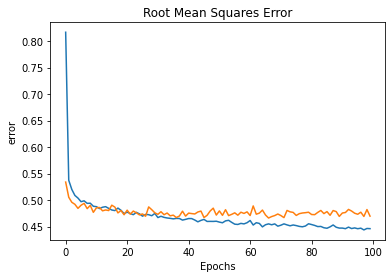

In [10]:
plt.plot(hist.history['root_mean_squared_error'], label='Train')
plt.plot(hist.history['val_root_mean_squared_error'], label='Validation')
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

# Get test evaluation metrics

In [11]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 1ms/step - loss: 0.2205 - root_mean_squared_error: 0.4696


[0.2204953134059906, 0.46956929564476013]

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

438.24774520960835

In [13]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7398191411928577

In [14]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[2321.07592773, 2511.2375    ],
       [ 526.94213867,  480.20512   ],
       [1286.34765625, 2017.5687    ],
       ...,
       [2083.39575195, 2171.7997    ],
       [2562.91137695, 2720.9167    ],
       [2093.23168945, 2119.1084    ]])

# Plot Real vs Predicted

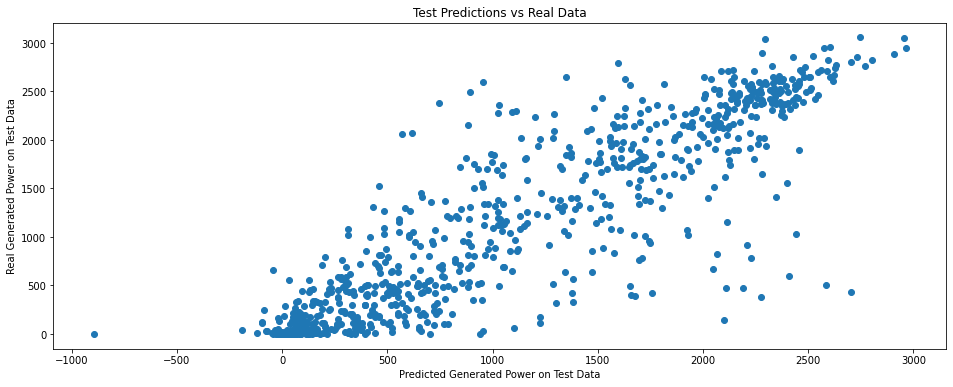

In [15]:
plt.figure(figsize=(16,6))
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
plt.show()